In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.drop_duplicates().shape

(891, 12)

In [6]:
df.dropna().shape

(183, 12)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
for col in df.columns:
    print(df[col].value_counts())
    print("-"*20)

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
--------------------
Survived
0    549
1    342
Name: count, dtype: int64
--------------------
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
--------------------
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
--------------------
Sex
male      577
female    314
Name: count, dtype: int64
--------------------
Age
24.00    30
22.00   

In [10]:
df["Survived"] = df["Survived"].map({1:"Survived",0:"Died"})
df["Embarked"] = df["Embarked"].map({'C': 'Cherbourg', 'Q':'Queenstown', 'S' : 'Southampton'})
df["Pclass"] = df["Pclass"].map({1:"Upper Class",2:"Middle Class",3:"Lower Class"})

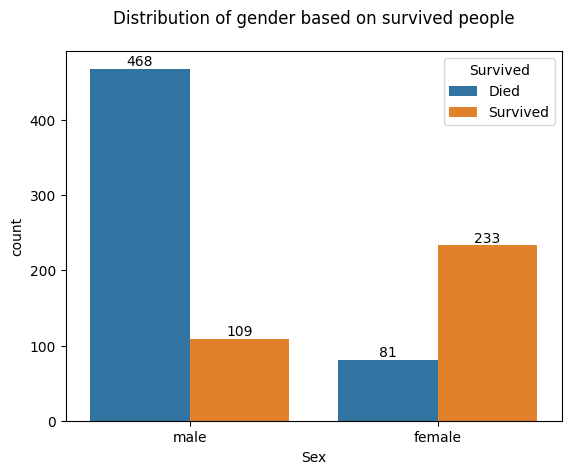

In [17]:
bar = sns.countplot(x=df["Sex"],hue=df["Survived"])
for container in bar.containers:
    plt.bar_label(container)
plt.title("Distribution of gender based on survived people",pad=20)
plt.show()

In [18]:
pClass = df["Pclass"].value_counts()
pClass

Pclass
Lower Class     491
Upper Class     216
Middle Class    184
Name: count, dtype: int64

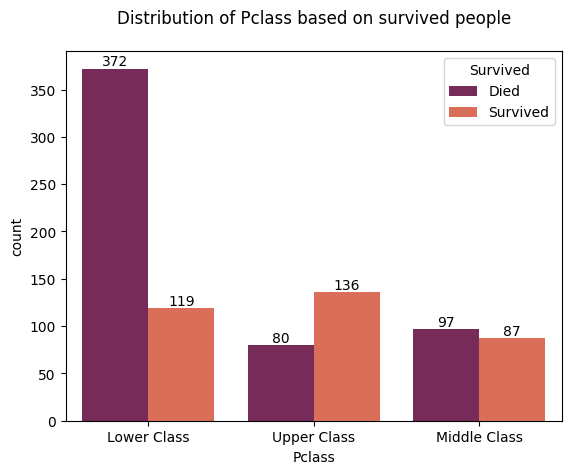

In [19]:
bar = sns.countplot(x=df["Pclass"],hue=df["Survived"],palette="rocket")
for container in bar.containers:
    plt.bar_label(container)
plt.title("Distribution of Pclass based on survived people",pad=20)
plt.show()

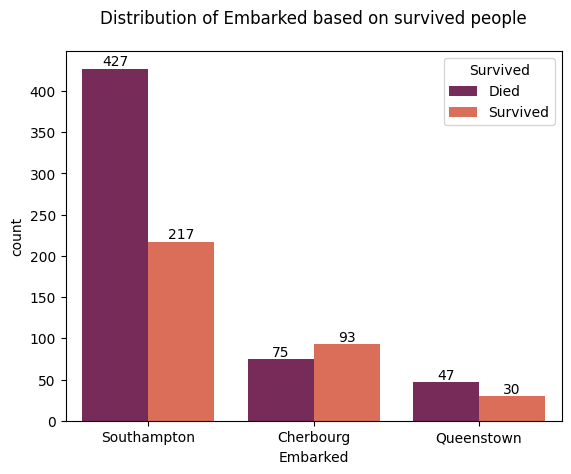

In [20]:
bar = sns.countplot(x=df["Embarked"],hue=df["Survived"],palette="rocket")
for container in bar.containers:
    plt.bar_label(container)
plt.title("Distribution of Embarked based on survived people",pad=20)
plt.show()

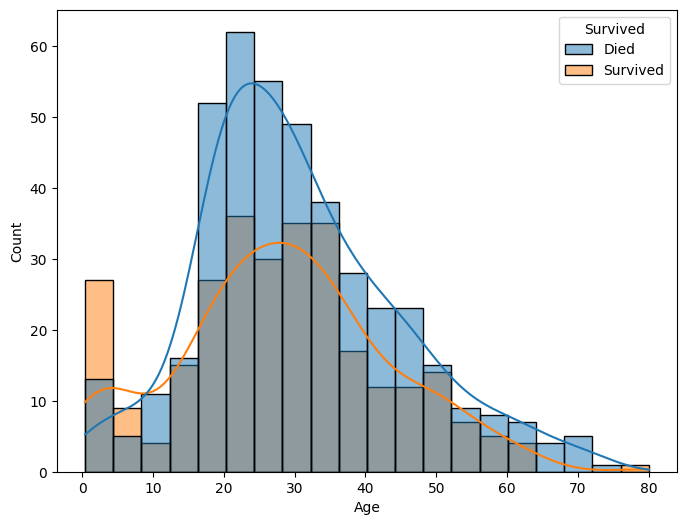

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df["Age"],hue=df["Survived"],kde=True)
plt.show()